In [191]:
# Importa as bibliotecas do Python

import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

In [192]:
# Importa as definições

from skimage import io
from google.colab.patches import cv2_imshow
from numpy.linalg import svd

In [193]:
# Definição para compreensão da imagem


def compress_image(img_name, img, k):
    print("processando...")

    # aplica esquema de array 2D em imagens SVD somente
    r = img[:, :, 0]  # array R
    g = img[:, :, 1]  # array G
    b = img[:, :, 2]  # array B

    print("convertendo...")

    # Calcula os componentes SVD
    ur, sr, vr = svd(r, full_matrices=False)
    ug, sg, vg = svd(g, full_matrices=False)
    ub, sb, vb = svd(b, full_matrices=False)

    print('dimensões do canal r: {}'.format(r.shape))

    # Formando a compreensão da imagem
    rr = np.dot(ur[:, :k], np.dot(np.diag(sr[:k]), vr[:k, :]))
    rg = np.dot(ug[:, :k], np.dot(np.diag(sg[:k]), vg[:k, :]))
    rb = np.dot(ub[:, :k], np.dot(np.diag(sb[:k]), vb[:k, :]))

    print("mostrando...")

    # cria varios zeros em uma matriz
    rimg = np.zeros(img.shape)

    # Adiciona a matriz para R, G & B na criação do array
    rimg[:, :, 0] = rr
    rimg[:, :, 1] = rg
    rimg[:, :, 2] = rb

    # codigos de conversão
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1, ind2, ind3] = abs(value)
                if value > 255:
                    rimg[ind1, ind2, ind3] = 255

    # converte o array em tipo uint8 para posteriores conversões das imagens
    compressed_image = rimg.astype(np.uint8)

    # mostra a imagem comprimida
    plt.title("Image Name - figura compactada: " + img_name + "\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    cv2.imwrite("Imagem/comp-" + str(img_name) + ".jpg", compressed_image)

    # codigos comentados abaixo é opcional para salvar a imagem
    # compressed_image = Image.fromarray(compressed_image)
    # compressed_image.save("image_name.jpg")

In [194]:
# Importa uma imagem de uma URL

url = "https://st2.depositphotos.com/1606646/48825/i/600/depositphotos_488252618-stock-photo-3d-python-symbol-on-white.jpg"
image = io.imread(url) 
img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

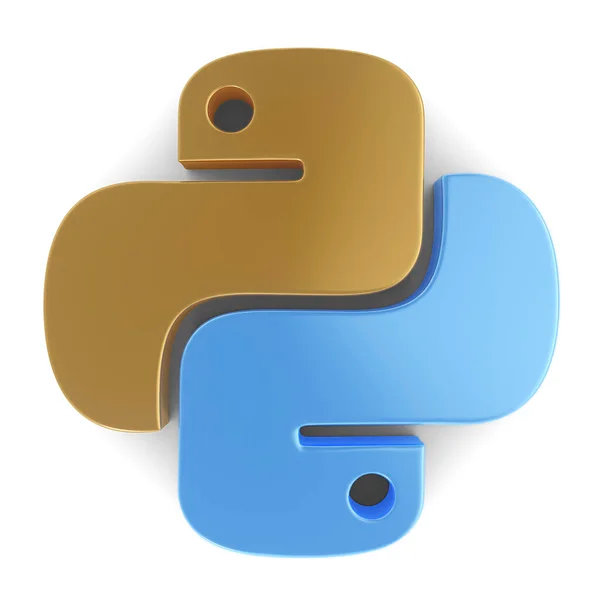

In [195]:
# Mostra a imagem

cv2_imshow(image)

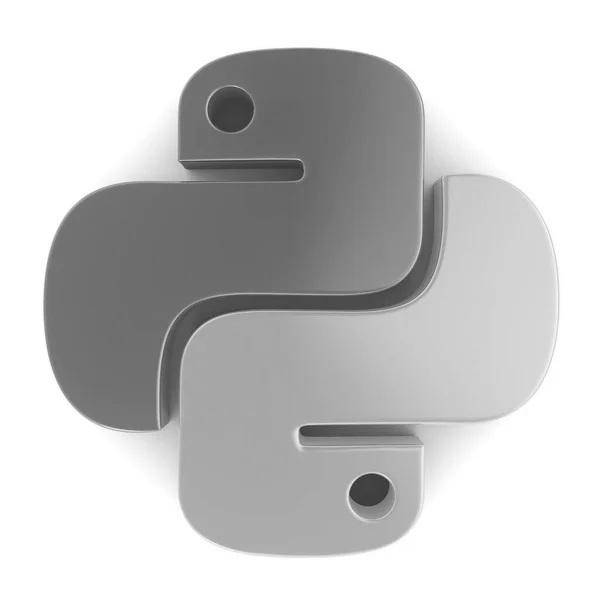

In [196]:
# Mostra a imagem em escala cinza

cv2_imshow(img)

In [197]:
# Verifica a altura e largura e o canal da imagem

image.shape

(600, 600, 3)

In [198]:
# Verifica a porcentagem para comprimir a imagem em 60, 70 e 80 porcento

# 60%
k = np.ceil(0.6*600)
print(k)

# 70%
k = np.ceil(0.7*600)
print(k)

# 80%
k = np.ceil(0.8*600)
print(k)

360.0
420.0
480.0


processando...
convertendo...
dimensões do canal r: (600, 600)
mostrando...


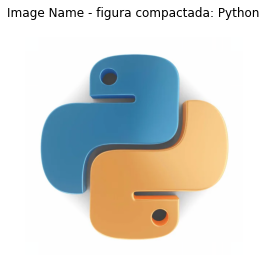

In [199]:
# Mostra a imagem com 60% da resolução

k = 360
compress_image("Python", image, k)

processando...
convertendo...
dimensões do canal r: (600, 600)
mostrando...


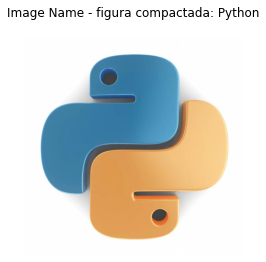

In [200]:
# Mostra a imagem com 70% da resolução

k = 420
compress_image("Python", image, k)

processando...
convertendo...
dimensões do canal r: (600, 600)
mostrando...


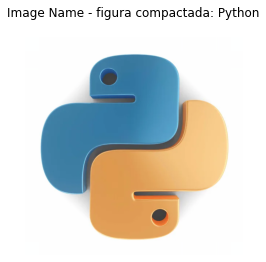

In [201]:
# Mostra a imagem com 80% da resolução

k = 480
compress_image("Python", image, k)